In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [3]:
air_df = pd.read_csv('Downloads/AirPassengers.csv')

In [4]:
air_df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
air_df['Month'] = pd.to_datetime(air_df['Month'], format='%Y-%M')
# print(air_df.head())

In [6]:
air_df.index = air_df['Month']
del air_df['Month']

In [7]:
air_df.head()

,#Passengers
Month,
1949-01-01 00:01:00,112
1949-01-01 00:02:00,118
1949-01-01 00:03:00,132
1949-01-01 00:04:00,129
1949-01-01 00:05:00,121


Text(0, 0.5, 'No of Passengers')

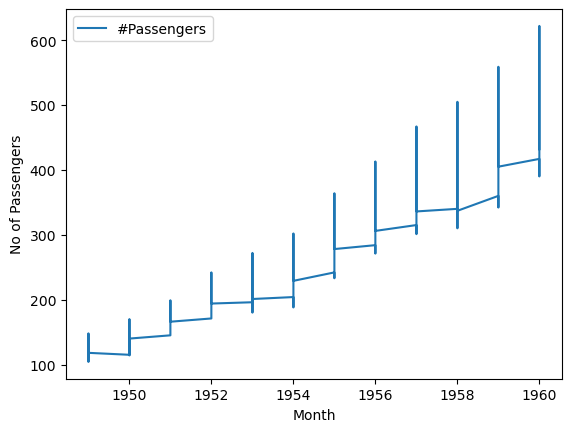

In [8]:
sns.lineplot(air_df)
plt.ylabel('No of Passengers')

In [9]:
result = seasonal_decompose(air_df['#Passengers'], model = 'multiplicative', period=12)

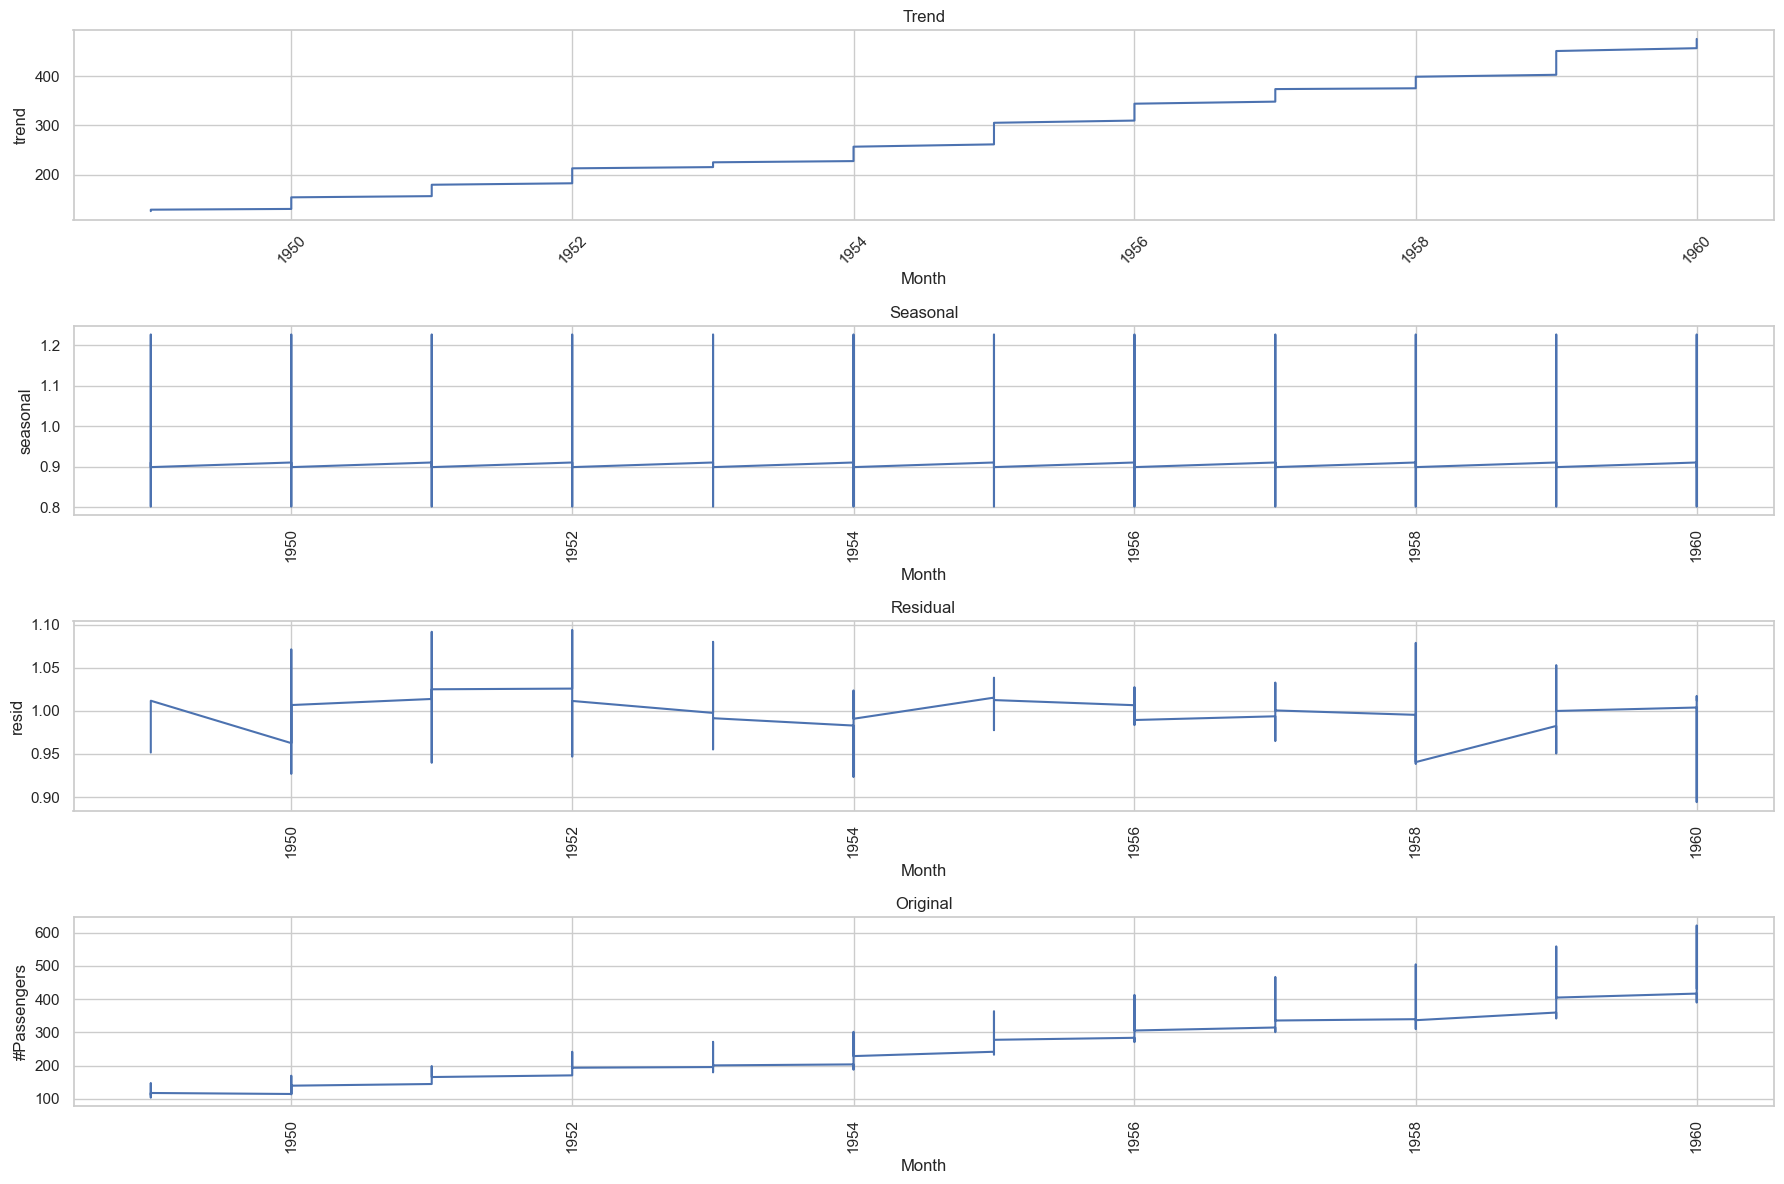

In [10]:
sns.set(style='whitegrid')
plt.figure(figsize=(18,12))

# Trend component
plt.subplot(411)
sns.lineplot(data=result.trend)
plt.title('Trend')
plt.xticks(rotation=45)

# Seasonal component
plt.subplot(412)
sns.lineplot(data=result.seasonal)
plt.title('Seasonal')
plt.xticks(rotation=90)

# Residual component
plt.subplot(413)
sns.lineplot(data=result.resid)
plt.title('Residual')
plt.xticks(rotation=90)

# Original data
plt.subplot(414)
sns.lineplot(data=air_df['#Passengers'])
plt.title('Original')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [11]:
seasonal_period = 12

In [12]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(air_df['#Passengers'], autolag='AIC')
print('ADF statistics', result[0])
print('P value', result[1])

ADF statistics 0.8153688792060597
P value 0.9918802434376411


In [13]:
result = adfuller(air_df['#Passengers'].diff().dropna(), autolag = 'AIC')
print('ADF statistics', result[0])
print('P value', result[1])

ADF statistics -2.829266824169992
P value 0.0542132902838265


In [14]:
result = adfuller(air_df['#Passengers'].diff().diff().dropna(), autolag = 'AIC')
print('ADF statistics', result[0])
print('P value', result[1])

ADF statistics -16.384231542468527
P value 2.732891850014085e-29


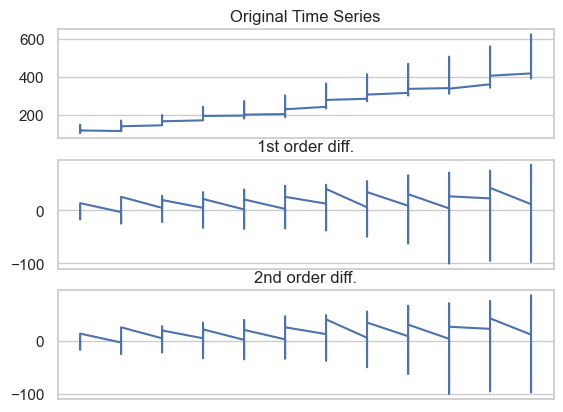

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(air_df)
ax1.set_title('Original Time Series')
ax1.axes.xaxis.set_visible(False)

ax2.plot(air_df.diff())
ax2.set_title('1st order diff.')
ax2.axes.xaxis.set_visible(False)

ax3.plot(air_df.diff())
ax3.set_title('2nd order diff.')
ax3.axes.xaxis.set_visible(False)

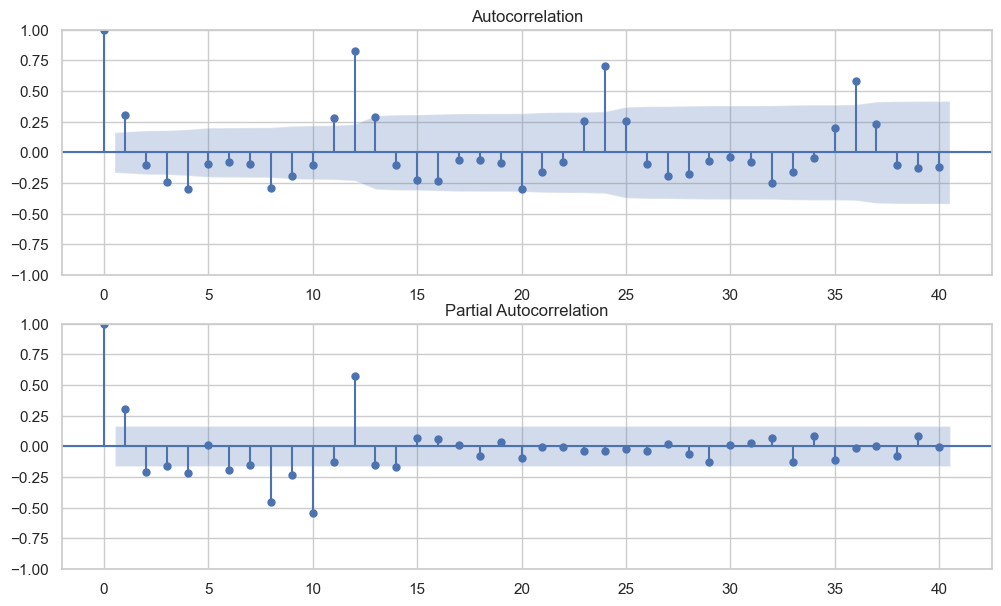

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(12, 7))
sm.graphics.tsa.plot_acf(air_df.diff().dropna(), lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(air_df.diff().dropna(), lags=40, ax=ax[1])
plt.show()

In [17]:
p =2 
d = 1
q=1

In [18]:
P = 1
D = 0
Q = 3

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(air_df['#Passengers'], order=(p, d, q), seasonal_order=(P, D, Q, seasonal_period))
fitted_model = model.fit()
print(fitted_model.summary())

C:\Users\ShravyaSrujan14\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ShravyaSrujan14\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ShravyaSrujan14\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\ShravyaSrujan14\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible startin

                                         SARIMAX Results                                          
Dep. Variable:                                #Passengers   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(1, 0, [1, 2, 3], 12)   Log Likelihood                -563.224
Date:                                    Wed, 14 Aug 2024   AIC                           1142.448
Time:                                            19:22:10   BIC                           1166.151
Sample:                                                 0   HQIC                          1152.080
                                                    - 144                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6247      0.101      6.170      0

In [23]:
forecast_steps = 24
forecast = fitted_model.get_forecast(steps = forecast_steps)

# air_df['Month'].astype('datetime64[us]')

forecast_index = pd.date_range(start=air_df.index[-1], periods=forecast_steps+1, freq='M')[1:].strftime('%Y-%m')

C:\Users\ShravyaSrujan14\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [24]:
#Create a forecast dataframe
forecast_df = pd.DataFrame({
    "Forecast": list(forecast.predicted_mean),
    "Upper CI": list(forecast.conf_int().iloc[:, 0]),
    "Lower CI": list(forecast.conf_int().iloc[:, 1])}, index=forecast_index
)

In [25]:
forecast_df

,Forecast,Upper CI,Lower CI
1960-02,446.728132,424.884418,468.571845
1960-03,423.354516,397.217023,449.492009
1960-04,456.481533,426.865410,486.097657
1960-05,491.604168,459.572999,523.635336
1960-06,505.178266,471.297560,539.058971
1960-07,562.393584,527.073468,597.713700
1960-08,647.900640,611.429108,684.372171
1960-09,635.546702,598.135915,672.957490
1960-10,541.119230,502.927939,579.310521
1960-11,494.171187,455.320373,533.022000


ConversionError: Failed to convert value(s) to axis units: array(['1949-01-01T00:01:00.000000000', '1949-01-01T00:02:00.000000000',
       '1949-01-01T00:03:00.000000000', '1949-01-01T00:04:00.000000000',
       '1949-01-01T00:05:00.000000000', '1949-01-01T00:06:00.000000000',
       '1949-01-01T00:07:00.000000000', '1949-01-01T00:08:00.000000000',
       '1949-01-01T00:09:00.000000000', '1949-01-01T00:10:00.000000000',
       '1949-01-01T00:11:00.000000000', '1949-01-01T00:12:00.000000000',
       '1950-01-01T00:01:00.000000000', '1950-01-01T00:02:00.000000000',
       '1950-01-01T00:03:00.000000000', '1950-01-01T00:04:00.000000000',
       '1950-01-01T00:05:00.000000000', '1950-01-01T00:06:00.000000000',
       '1950-01-01T00:07:00.000000000', '1950-01-01T00:08:00.000000000',
       '1950-01-01T00:09:00.000000000', '1950-01-01T00:10:00.000000000',
       '1950-01-01T00:11:00.000000000', '1950-01-01T00:12:00.000000000',
       '1951-01-01T00:01:00.000000000', '1951-01-01T00:02:00.000000000',
       '1951-01-01T00:03:00.000000000', '1951-01-01T00:04:00.000000000',
       '1951-01-01T00:05:00.000000000', '1951-01-01T00:06:00.000000000',
       '1951-01-01T00:07:00.000000000', '1951-01-01T00:08:00.000000000',
       '1951-01-01T00:09:00.000000000', '1951-01-01T00:10:00.000000000',
       '1951-01-01T00:11:00.000000000', '1951-01-01T00:12:00.000000000',
       '1952-01-01T00:01:00.000000000', '1952-01-01T00:02:00.000000000',
       '1952-01-01T00:03:00.000000000', '1952-01-01T00:04:00.000000000',
       '1952-01-01T00:05:00.000000000', '1952-01-01T00:06:00.000000000',
       '1952-01-01T00:07:00.000000000', '1952-01-01T00:08:00.000000000',
       '1952-01-01T00:09:00.000000000', '1952-01-01T00:10:00.000000000',
       '1952-01-01T00:11:00.000000000', '1952-01-01T00:12:00.000000000',
       '1953-01-01T00:01:00.000000000', '1953-01-01T00:02:00.000000000',
       '1953-01-01T00:03:00.000000000', '1953-01-01T00:04:00.000000000',
       '1953-01-01T00:05:00.000000000', '1953-01-01T00:06:00.000000000',
       '1953-01-01T00:07:00.000000000', '1953-01-01T00:08:00.000000000',
       '1953-01-01T00:09:00.000000000', '1953-01-01T00:10:00.000000000',
       '1953-01-01T00:11:00.000000000', '1953-01-01T00:12:00.000000000',
       '1954-01-01T00:01:00.000000000', '1954-01-01T00:02:00.000000000',
       '1954-01-01T00:03:00.000000000', '1954-01-01T00:04:00.000000000',
       '1954-01-01T00:05:00.000000000', '1954-01-01T00:06:00.000000000',
       '1954-01-01T00:07:00.000000000', '1954-01-01T00:08:00.000000000',
       '1954-01-01T00:09:00.000000000', '1954-01-01T00:10:00.000000000',
       '1954-01-01T00:11:00.000000000', '1954-01-01T00:12:00.000000000',
       '1955-01-01T00:01:00.000000000', '1955-01-01T00:02:00.000000000',
       '1955-01-01T00:03:00.000000000', '1955-01-01T00:04:00.000000000',
       '1955-01-01T00:05:00.000000000', '1955-01-01T00:06:00.000000000',
       '1955-01-01T00:07:00.000000000', '1955-01-01T00:08:00.000000000',
       '1955-01-01T00:09:00.000000000', '1955-01-01T00:10:00.000000000',
       '1955-01-01T00:11:00.000000000', '1955-01-01T00:12:00.000000000',
       '1956-01-01T00:01:00.000000000', '1956-01-01T00:02:00.000000000',
       '1956-01-01T00:03:00.000000000', '1956-01-01T00:04:00.000000000',
       '1956-01-01T00:05:00.000000000', '1956-01-01T00:06:00.000000000',
       '1956-01-01T00:07:00.000000000', '1956-01-01T00:08:00.000000000',
       '1956-01-01T00:09:00.000000000', '1956-01-01T00:10:00.000000000',
       '1956-01-01T00:11:00.000000000', '1956-01-01T00:12:00.000000000',
       '1957-01-01T00:01:00.000000000', '1957-01-01T00:02:00.000000000',
       '1957-01-01T00:03:00.000000000', '1957-01-01T00:04:00.000000000',
       '1957-01-01T00:05:00.000000000', '1957-01-01T00:06:00.000000000',
       '1957-01-01T00:07:00.000000000', '1957-01-01T00:08:00.000000000',
       '1957-01-01T00:09:00.000000000', '1957-01-01T00:10:00.000000000',
       '1957-01-01T00:11:00.000000000', '1957-01-01T00:12:00.000000000',
       '1958-01-01T00:01:00.000000000', '1958-01-01T00:02:00.000000000',
       '1958-01-01T00:03:00.000000000', '1958-01-01T00:04:00.000000000',
       '1958-01-01T00:05:00.000000000', '1958-01-01T00:06:00.000000000',
       '1958-01-01T00:07:00.000000000', '1958-01-01T00:08:00.000000000',
       '1958-01-01T00:09:00.000000000', '1958-01-01T00:10:00.000000000',
       '1958-01-01T00:11:00.000000000', '1958-01-01T00:12:00.000000000',
       '1959-01-01T00:01:00.000000000', '1959-01-01T00:02:00.000000000',
       '1959-01-01T00:03:00.000000000', '1959-01-01T00:04:00.000000000',
       '1959-01-01T00:05:00.000000000', '1959-01-01T00:06:00.000000000',
       '1959-01-01T00:07:00.000000000', '1959-01-01T00:08:00.000000000',
       '1959-01-01T00:09:00.000000000', '1959-01-01T00:10:00.000000000',
       '1959-01-01T00:11:00.000000000', '1959-01-01T00:12:00.000000000',
       '1960-01-01T00:01:00.000000000', '1960-01-01T00:02:00.000000000',
       '1960-01-01T00:03:00.000000000', '1960-01-01T00:04:00.000000000',
       '1960-01-01T00:05:00.000000000', '1960-01-01T00:06:00.000000000',
       '1960-01-01T00:07:00.000000000', '1960-01-01T00:08:00.000000000',
       '1960-01-01T00:09:00.000000000', '1960-01-01T00:10:00.000000000',
       '1960-01-01T00:11:00.000000000', '1960-01-01T00:12:00.000000000'],
      dtype='datetime64[ns]')

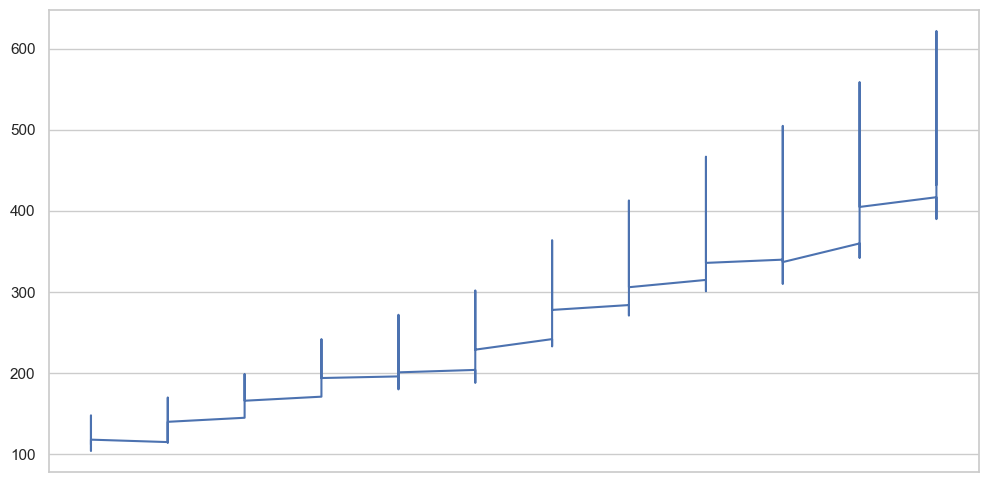

In [26]:
# plot the forecast values

plt.figure(figsize=(12, 6))
plt.plot(air_df['#Passengers'], label='Historical Data')
plt.plot(forecast_df['Forecast'], label='Forecast Data')
plt.fill_between(forecast_df.index, forecast_df['Lower CI'], forecast_df['Upper CI'], color='k', alpha=0.1)
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Air Passengers Forecast')
plt.xticks(rotation=90)
plt.legend()
plt.show()